In [1]:
import matplotlib.pyplot as plt
import mne
import pandas as pd
import regex as re

from src.data_loader import DataLoader
from src.model.measurement import KEEP_COLUMNS, Measurement

In [2]:
measurements = sorted(next(DataLoader.get_train_iter(batch_size=10)))
measurements

[Measurement(age=23, file=train/00000039_s005_t000.parquet),
 Measurement(age=34, file=train/00000021_s004_t000.parquet),
 Measurement(age=36, file=train/00000312_s002_t000.parquet),
 Measurement(age=36, file=train/00000466_s002_t000.parquet),
 Measurement(age=39, file=train/00000361_s003_t001.parquet),
 Measurement(age=44, file=train/00000355_s003_t000.parquet),
 Measurement(age=51, file=train/00000296_s002_t000.parquet),
 Measurement(age=58, file=train/00000407_s002_t001.parquet),
 Measurement(age=60, file=train/00000436_s002_t001.parquet),
 Measurement(age=63, file=train/00000417_s004_t000.parquet)]

In [7]:
def plot_charts(measurement: Measurement):
    print(f"---- AGE: {measurement.age} ----")
    data = measurement.data

    column_map = dict(
        zip(
            [col for col in data.columns if "EEG" in col],
            [
                re.findall(r"(?<=EEG\s)(.+)(?=\-REF)", column)[0].lower().capitalize()
                for column in data.columns
                if "EEG" in column
            ],
        )
    )

    to_remove = ["Ekg1", "T1", "T2", "IBI", "BURSTS", "SUPPR"]

    columns_formatted = []
    for column in data[KEEP_COLUMNS].columns:
        mapped = column_map.get(column, column)
        if mapped in to_remove:
            continue

        columns_formatted.append(mapped)

    mapped_data = data[KEEP_COLUMNS].rename(columns=dict(zip(data[KEEP_COLUMNS].columns, columns_formatted)))
    mapped_data = mapped_data[columns_formatted]

    info = mne.create_info(
        ch_names=list(columns_formatted),
        sfreq=250,
        ch_types=["eeg"] * len(columns_formatted),
    )

    raw = mne.io.RawArray(mapped_data.values.T, info)
    standard_montage = mne.channels.make_standard_montage("standard_1020")
    raw.set_montage(standard_montage)

    raw.compute_psd().plot()
    raw.compute_psd().plot(average=True)
    plt.show()

    ica = mne.preprocessing.ICA(n_components=14, random_state=789)
    ica.fit(raw.copy().filter(1, None, verbose=False), verbose=False)
    ica.plot_components()

---- AGE: 23 ----
Creating RawArray with float64 data, n_channels=21, n_times=329250
    Range : 0 ... 329249 =      0.000 ...  1316.996 secs
Ready.
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)


/home/marek/mambaforge/envs/mp/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/home/marek/mambaforge/envs/mp/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


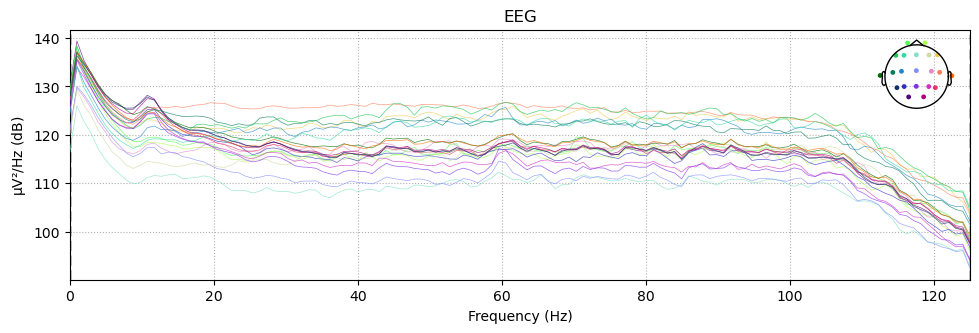

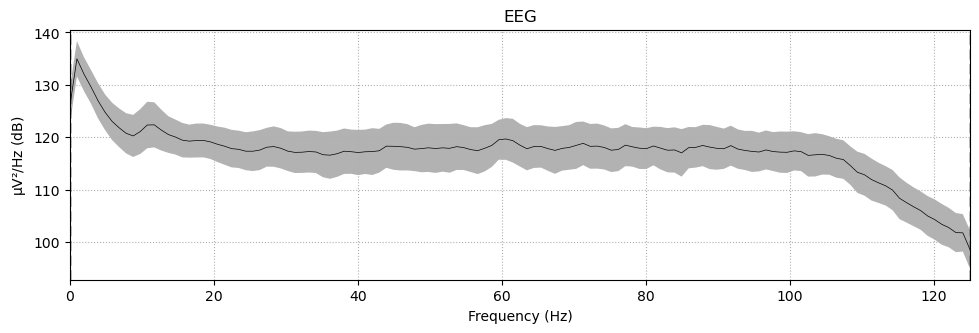

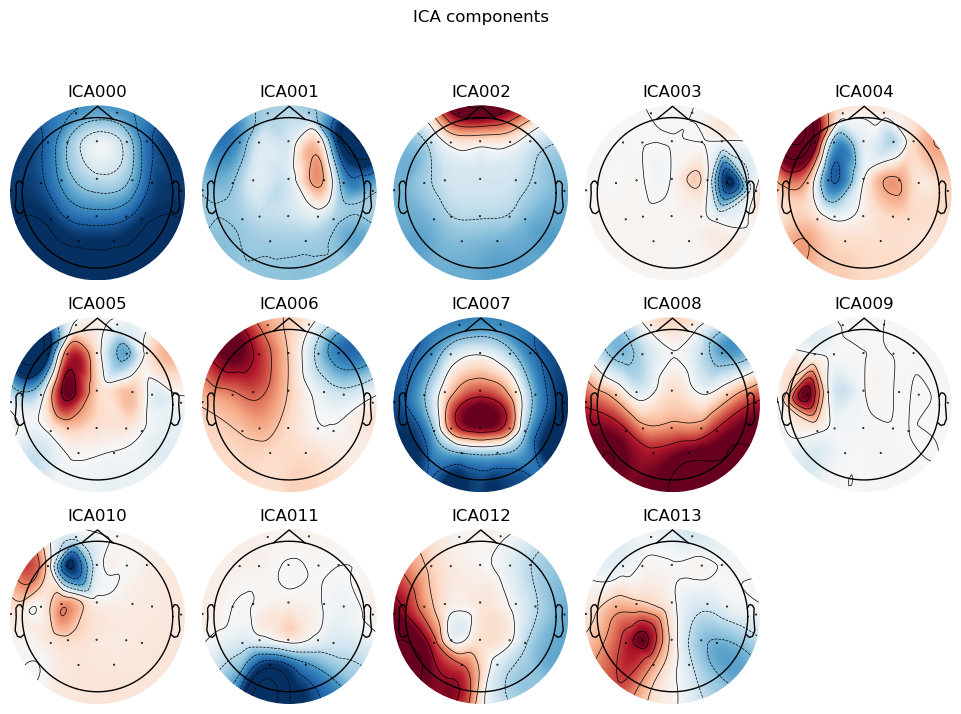

---- AGE: 34 ----
Creating RawArray with float64 data, n_channels=21, n_times=317000
    Range : 0 ... 316999 =      0.000 ...  1267.996 secs
Ready.
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)


/home/marek/mambaforge/envs/mp/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/home/marek/mambaforge/envs/mp/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


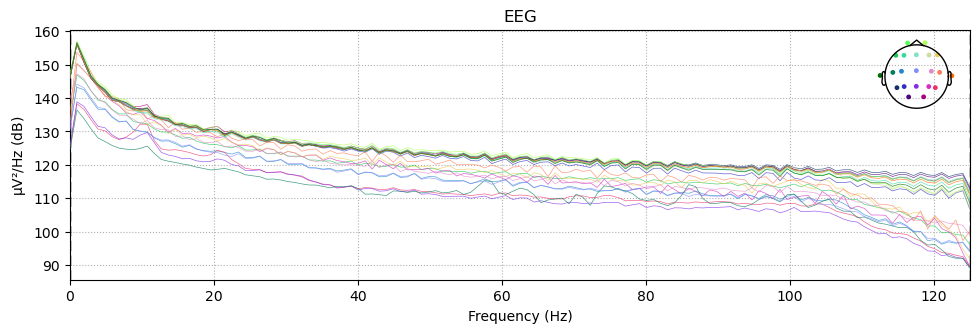

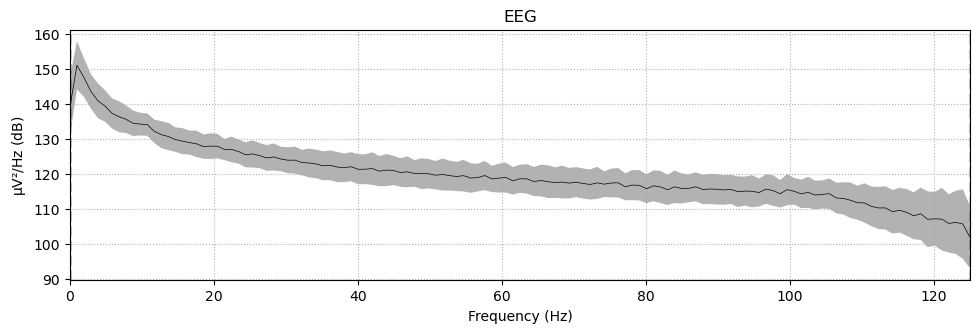

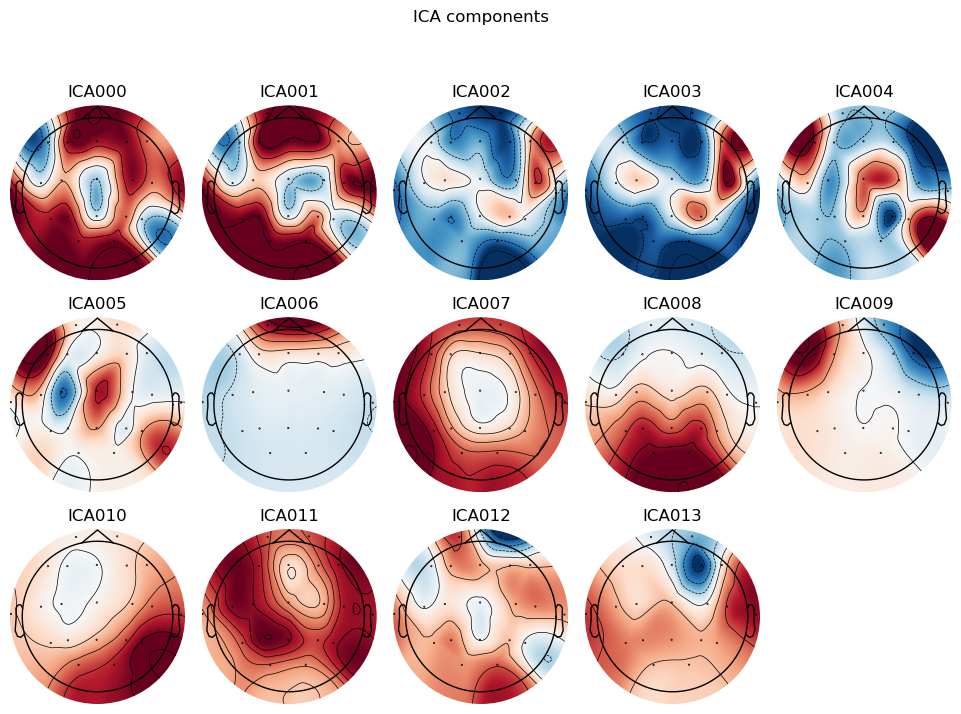

---- AGE: 36 ----
Creating RawArray with float64 data, n_channels=21, n_times=334500
    Range : 0 ... 334499 =      0.000 ...  1337.996 secs
Ready.
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)


/home/marek/mambaforge/envs/mp/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/home/marek/mambaforge/envs/mp/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


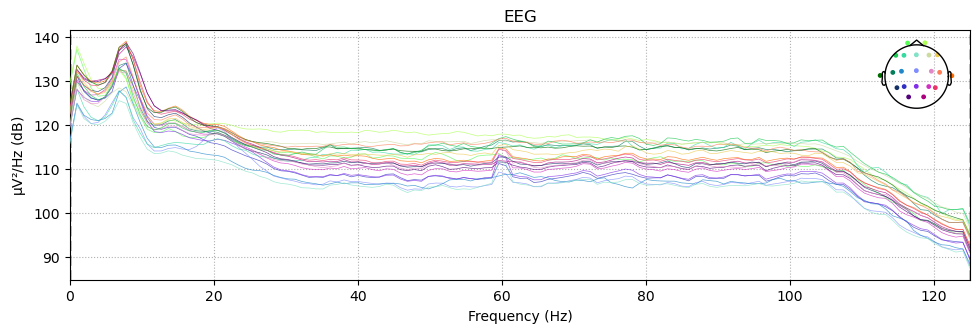

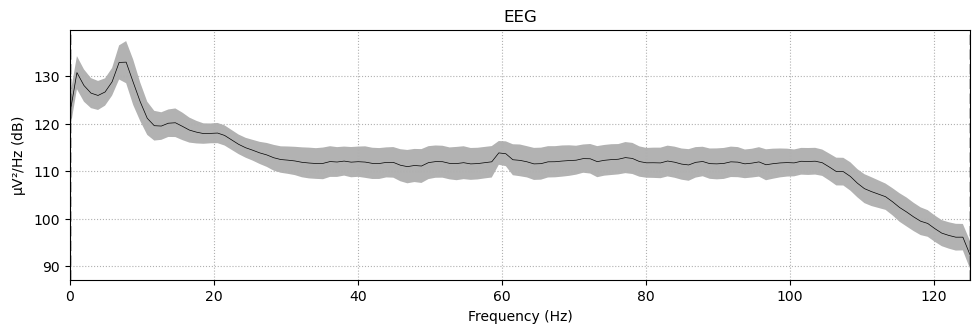

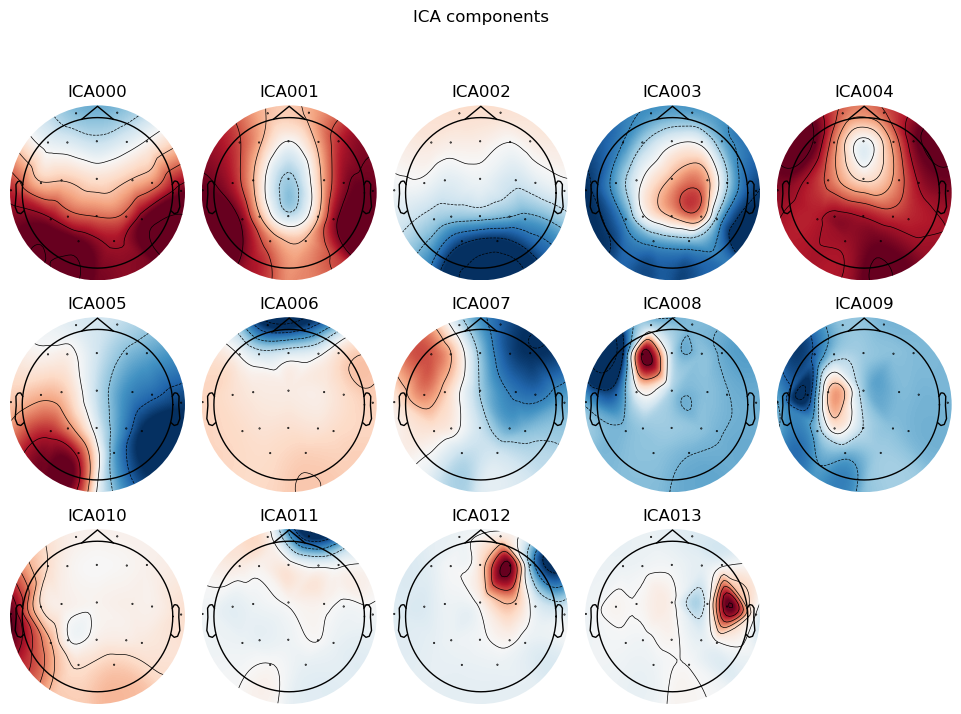

---- AGE: 36 ----
Creating RawArray with float64 data, n_channels=21, n_times=347500
    Range : 0 ... 347499 =      0.000 ...  1389.996 secs
Ready.
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)


/home/marek/mambaforge/envs/mp/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/home/marek/mambaforge/envs/mp/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


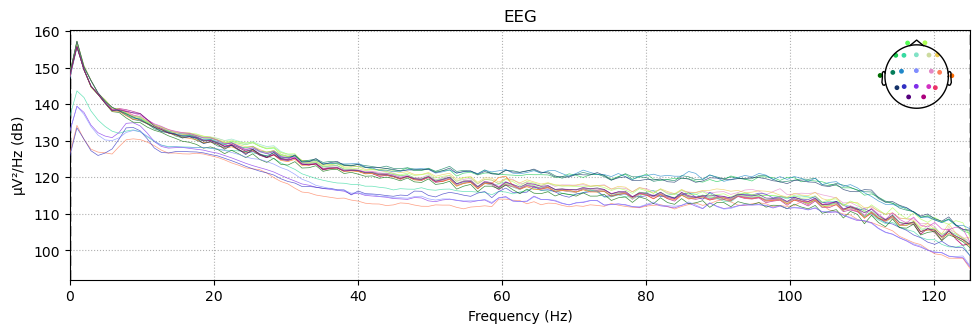

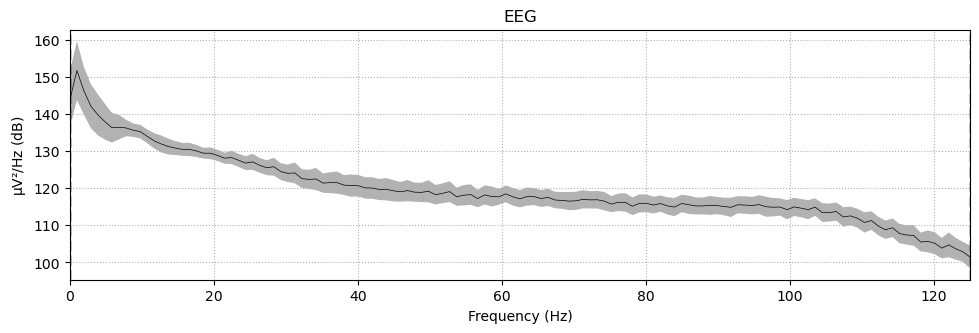

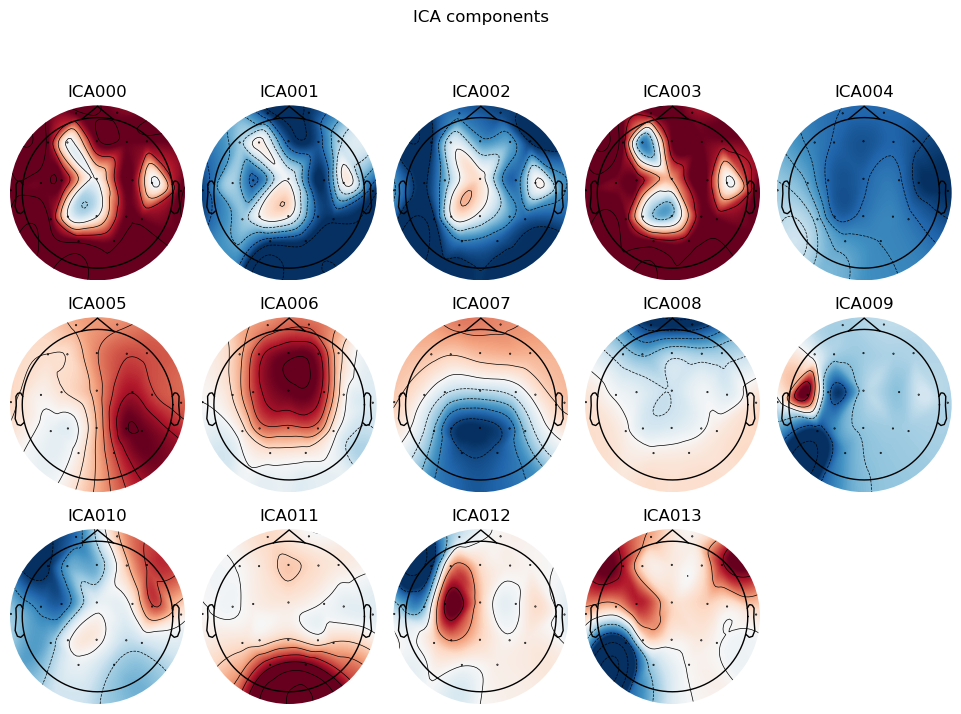

---- AGE: 39 ----
Creating RawArray with float64 data, n_channels=21, n_times=295500
    Range : 0 ... 295499 =      0.000 ...  1181.996 secs
Ready.
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)


/home/marek/mambaforge/envs/mp/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/home/marek/mambaforge/envs/mp/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


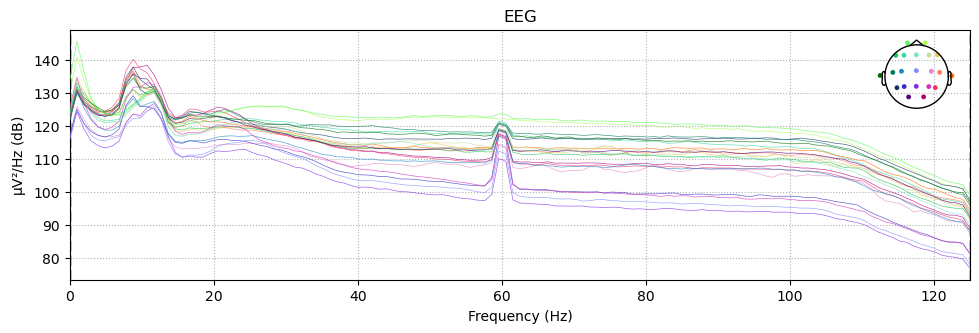

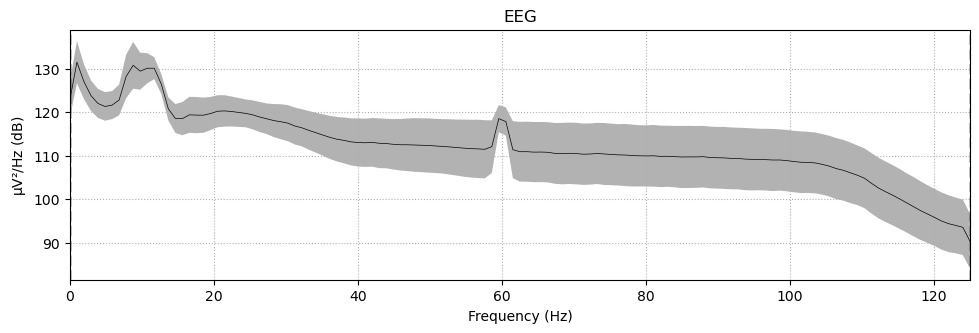

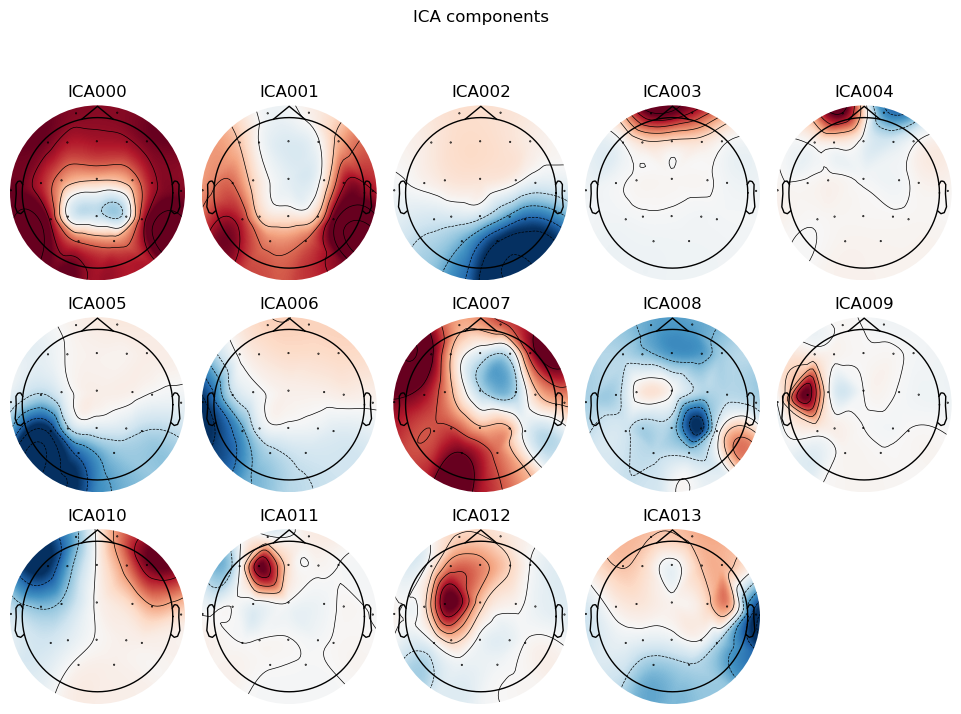

---- AGE: 44 ----
Creating RawArray with float64 data, n_channels=21, n_times=331250
    Range : 0 ... 331249 =      0.000 ...  1324.996 secs
Ready.
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)


/home/marek/mambaforge/envs/mp/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/home/marek/mambaforge/envs/mp/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


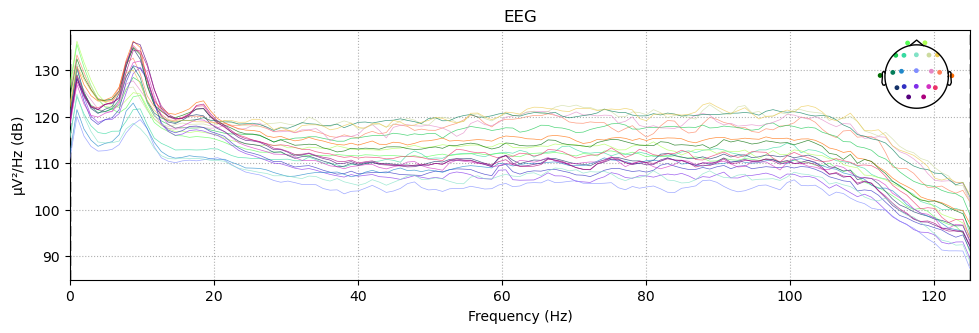

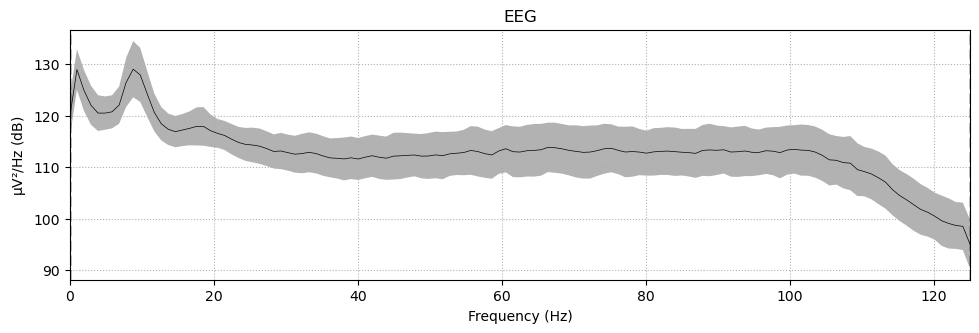

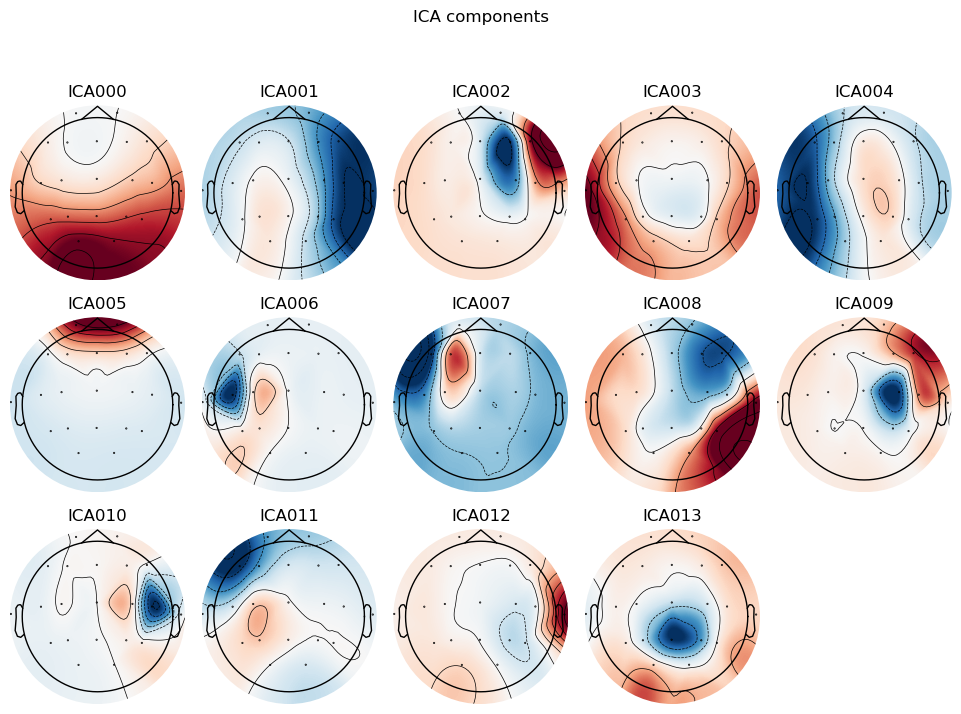

---- AGE: 51 ----
Creating RawArray with float64 data, n_channels=21, n_times=304750
    Range : 0 ... 304749 =      0.000 ...  1218.996 secs
Ready.
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)


/home/marek/mambaforge/envs/mp/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/home/marek/mambaforge/envs/mp/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


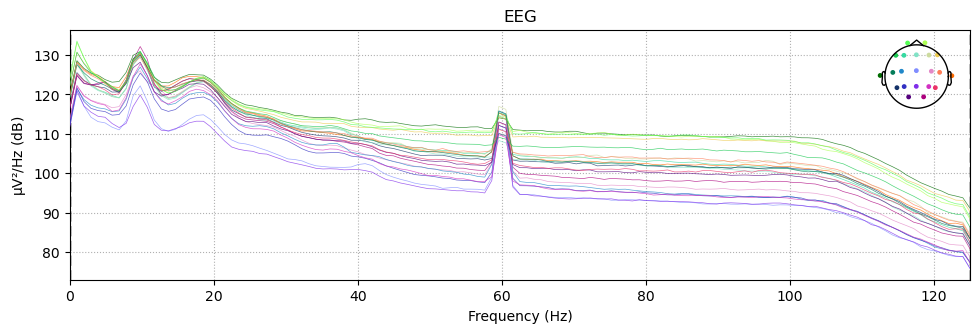

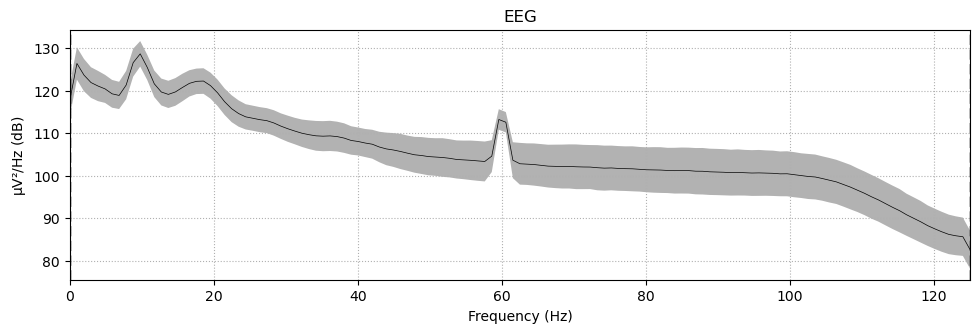

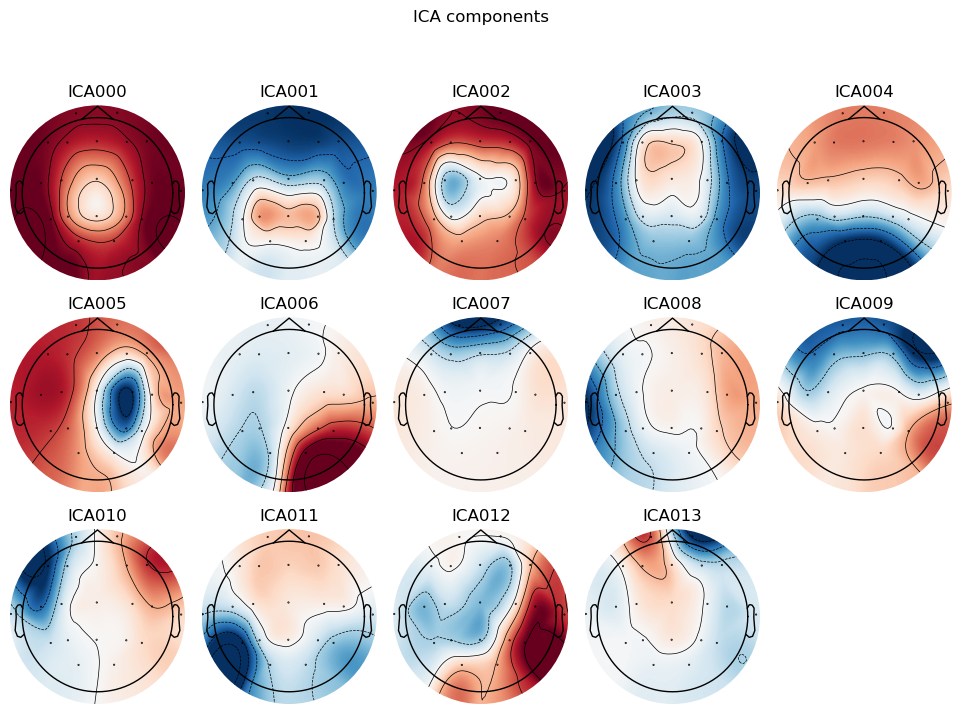

---- AGE: 58 ----
Creating RawArray with float64 data, n_channels=21, n_times=301500
    Range : 0 ... 301499 =      0.000 ...  1205.996 secs
Ready.
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)


/home/marek/mambaforge/envs/mp/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/home/marek/mambaforge/envs/mp/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


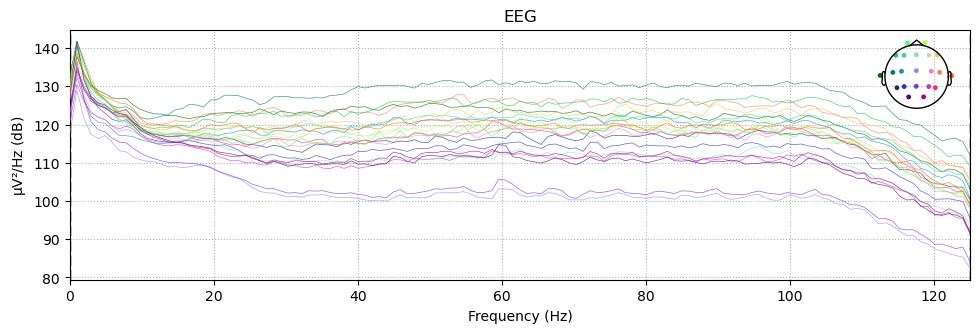

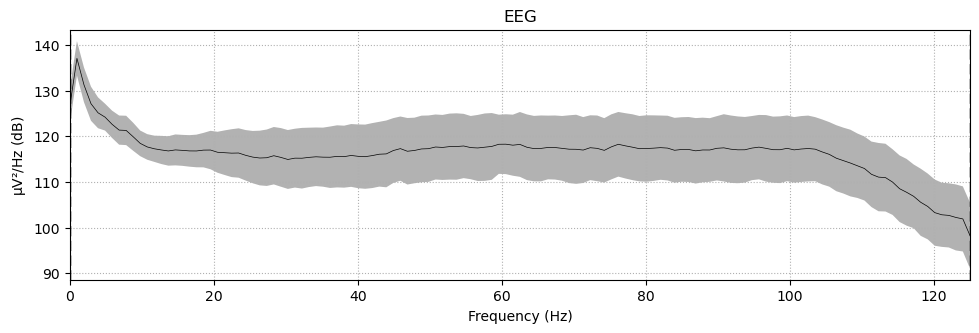

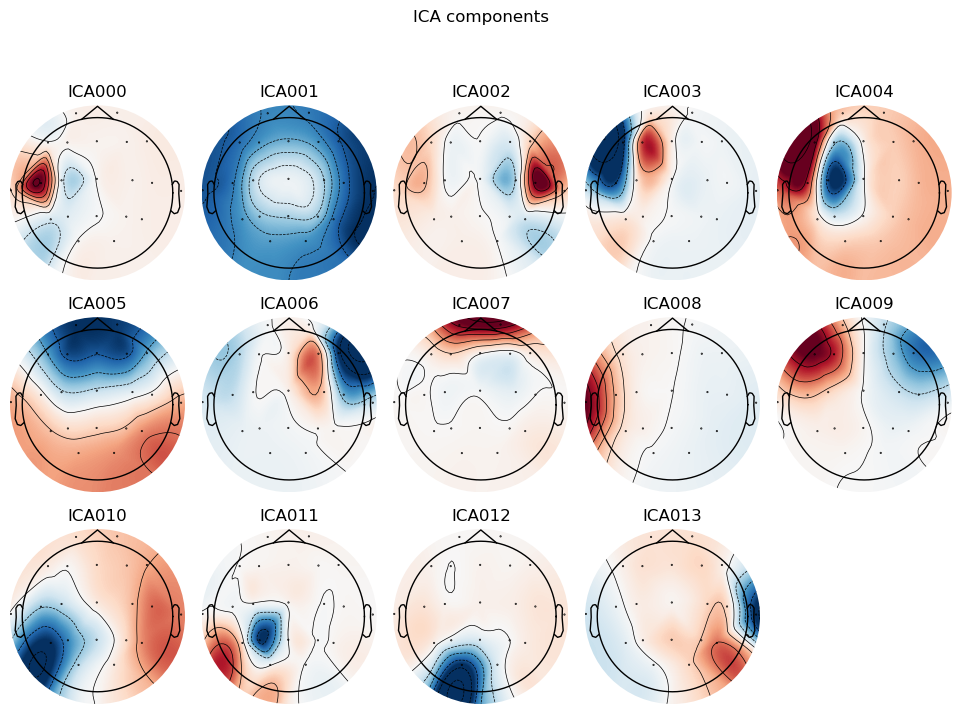

---- AGE: 60 ----
Creating RawArray with float64 data, n_channels=21, n_times=331500
    Range : 0 ... 331499 =      0.000 ...  1325.996 secs
Ready.
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)


/home/marek/mambaforge/envs/mp/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/home/marek/mambaforge/envs/mp/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


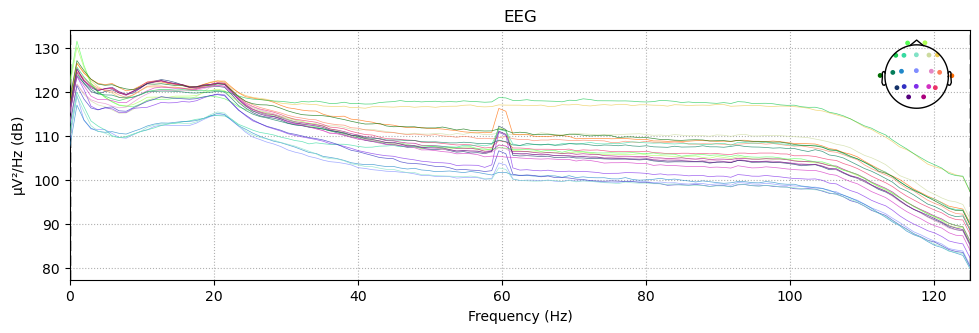

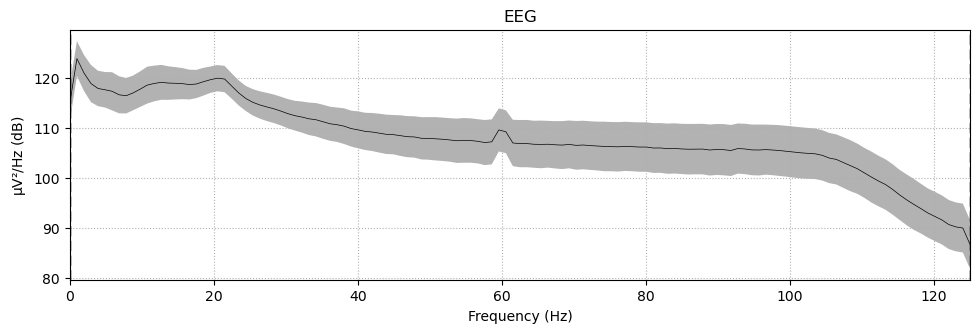

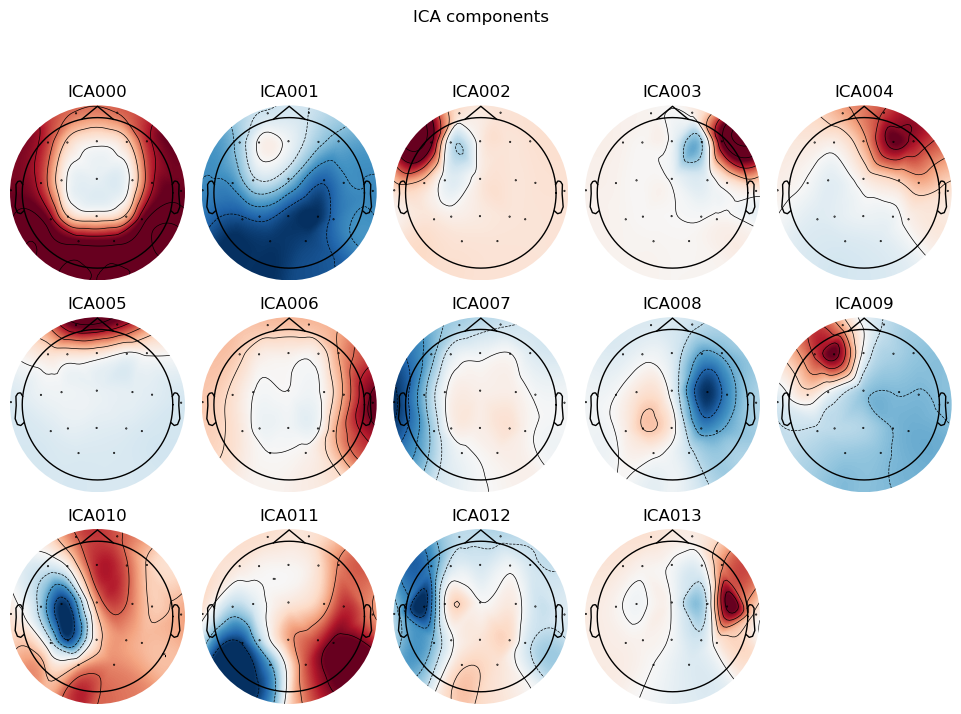

---- AGE: 63 ----
Creating RawArray with float64 data, n_channels=21, n_times=376500
    Range : 0 ... 376499 =      0.000 ...  1505.996 secs
Ready.
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)


/home/marek/mambaforge/envs/mp/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/home/marek/mambaforge/envs/mp/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


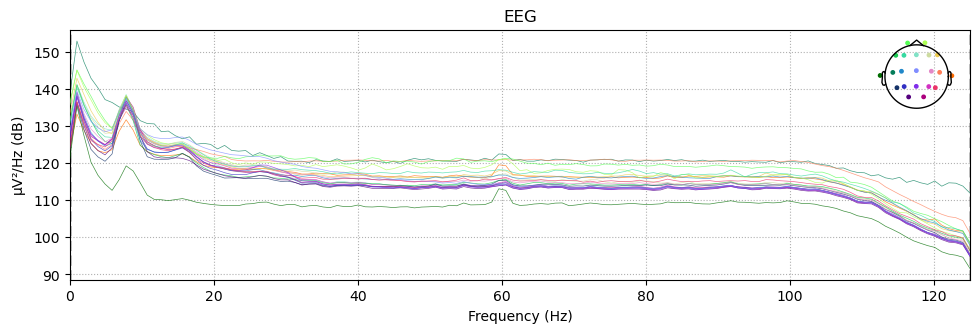

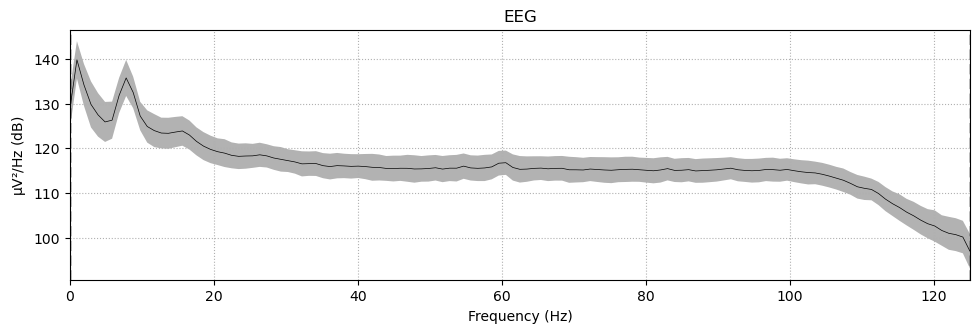

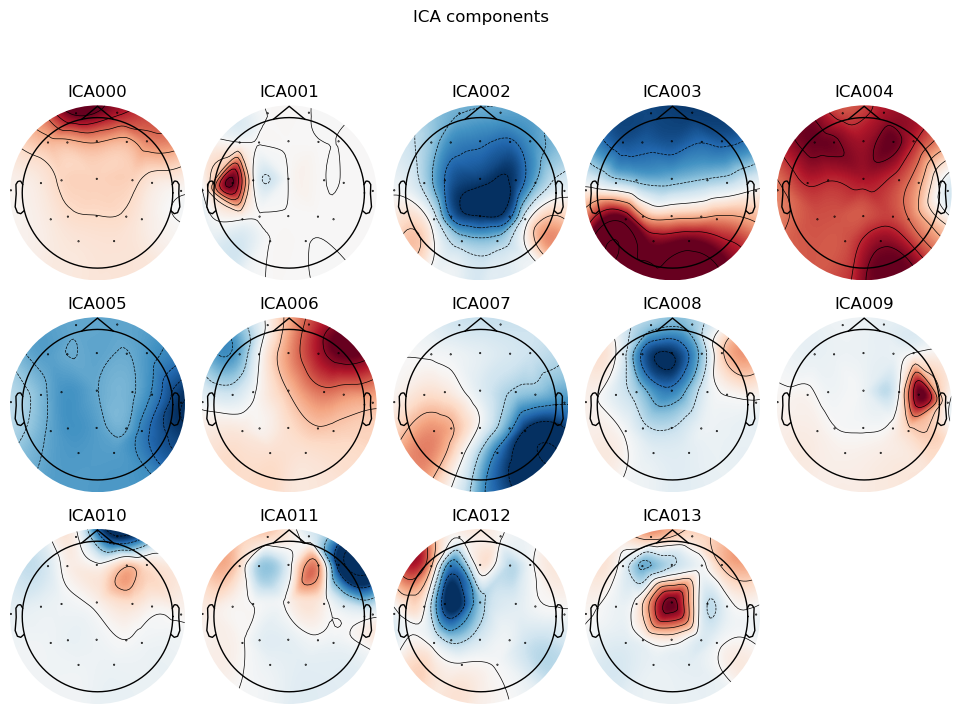

In [8]:
for measurement in measurements:
    plot_charts(measurement)